## Saneamento Básico e Poluição (Fine Particular Matter), Expectativa de vida e IDH

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import SimpleImputer
import plotly.express as px

In [3]:
df_expectativa_vida = pd.read_csv('expectativa_vida.csv', sep=',')
#modificar para o arquivo local

df_expectativa_vida  = df_expectativa_vida[['Indicator','ParentLocation','Country', 'Period', 'Dim1', 'Value']]

# Pivotando o dataframe para transformar a coluna 'Period' em colunas separadas para os anos desejados
df_expectativa_vida = df_expectativa_vida.pivot_table(index=['Indicator', 'ParentLocation', 'Country', 'Dim1'], columns='Period', values='Value').reset_index()

# Selecionando apenas as colunas desejadas
df_expectativa_vida = df_expectativa_vida[['Indicator', 'ParentLocation', 'Country', 'Dim1', 2000, 2010, 2015, 2019]]
df_expectativa_vida.head()

Period,Indicator,ParentLocation,Country,Dim1,2000,2010,2015,2019
0,Life expectancy at age 60 (years),Africa,Algeria,Both sexes,19.81,21.37,21.81,22.04
1,Life expectancy at age 60 (years),Africa,Algeria,Female,20.25,21.85,22.33,22.62
2,Life expectancy at age 60 (years),Africa,Algeria,Male,19.36,20.89,21.33,21.53
3,Life expectancy at age 60 (years),Africa,Angola,Both sexes,14.42,15.97,16.71,16.98
4,Life expectancy at age 60 (years),Africa,Angola,Female,16.01,17.54,18.42,18.55


In [4]:
df_expectativa_ao_nascer = df_expectativa_vida[df_expectativa_vida['Indicator'] == 'Life expectancy at birth (years)']
df_expectativa_ao_nascer= df_expectativa_ao_nascer[df_expectativa_ao_nascer['Dim1'] == 'Both sexes']

df_expectativa_ao_nascer.head()


Period,Indicator,ParentLocation,Country,Dim1,2000,2010,2015,2019
549,Life expectancy at birth (years),Africa,Algeria,Both sexes,72.21,75.85,76.54,77.13
552,Life expectancy at birth (years),Africa,Angola,Both sexes,49.30,58.07,61.72,63.06
555,Life expectancy at birth (years),Africa,Benin,Both sexes,56.59,60.47,61.96,63.43
558,Life expectancy at birth (years),Africa,Botswana,Both sexes,45.59,58.14,60.93,62.25
561,Life expectancy at birth (years),Africa,Burkina Faso,Both sexes,51.64,58.59,60.92,62.70


In [5]:
df_expectativa_aos_60 = df_expectativa_vida[df_expectativa_vida['Indicator'] == 'Life expectancy at age 60 (years)']
df_expectativa_aos_60 = df_expectativa_aos_60[df_expectativa_aos_60['Dim1'] == 'Both sexes']
df_expectativa_aos_60.head()

Period,Indicator,ParentLocation,Country,Dim1,2000,2010,2015,2019
0,Life expectancy at age 60 (years),Africa,Algeria,Both sexes,19.81,21.37,21.81,22.04
3,Life expectancy at age 60 (years),Africa,Angola,Both sexes,14.42,15.97,16.71,16.98
6,Life expectancy at age 60 (years),Africa,Benin,Both sexes,16.08,16.69,17.01,17.40
9,Life expectancy at age 60 (years),Africa,Botswana,Both sexes,12.92,15.26,15.89,16.25
12,Life expectancy at age 60 (years),Africa,Burkina Faso,Both sexes,15.52,16.17,16.44,16.82


In [6]:
df_hdi = pd.read_csv('HDI.csv', sep=',', encoding='ISO-8859-1')
df_hdi = df_hdi[['Country', 'HDI Rank', '2000','2010', '2015', '2019']]


# Criando o imputer
imputer = SimpleImputer(strategy='mean')

# Preenchendo os valores faltantes com a média
df_hdi['2000'] = imputer.fit_transform(df_hdi[['2000']])
df_hdi['2010'] = imputer.fit_transform(df_hdi[['2010']])
df_hdi['2015'] = imputer.fit_transform(df_hdi[['2015']])
df_hdi['HDI Rank'] = imputer.fit_transform(df_hdi[['HDI Rank']])

df_hdi.head()

,Country,HDI Rank,2000,2010,2015,2019
0,Afghanistan,169.0,0.350,0.472,0.500,0.511
1,Albania,69.0,0.671,0.745,0.788,0.795
2,Algeria,91.0,0.637,0.721,0.740,0.748
3,Andorra,36.0,0.813,0.837,0.862,0.868
4,Angola,148.0,0.400,0.517,0.572,0.581


In [7]:
df_expectativa_ao_nascer = df_expectativa_ao_nascer.rename(columns={2000: 'LifeExp_2000', 2010: 'LifeExp_2010', 2015: 'LifeExp_2015', 2019: 'LifeExp_2019'})
df_hdi = df_hdi.rename(columns={'2000': 'HDI_2000', '2010': 'HDI_2010', '2015': 'HDI_2015', '2019': 'HDI_2019'})

In [8]:
merged_df_12 = pd.merge(df_expectativa_ao_nascer, df_hdi, on='Country', how='inner')

merged_df_12.head(300)

,Indicator,ParentLocation,Country,Dim1,LifeExp_2000,LifeExp_2010,LifeExp_2015,LifeExp_2019,HDI Rank,HDI_2000,HDI_2010,HDI_2015,HDI_2019
0,Life expectancy at birth (years),Africa,Algeria,Both sexes,72.21,75.85,76.54,77.13,91.0,0.637000,0.721,0.740,0.748
1,Life expectancy at birth (years),Africa,Angola,Both sexes,49.30,58.07,61.72,63.06,148.0,0.400000,0.517,0.572,0.581
2,Life expectancy at birth (years),Africa,Benin,Both sexes,56.59,60.47,61.96,63.43,158.0,0.416000,0.494,0.532,0.545
3,Life expectancy at birth (years),Africa,Botswana,Both sexes,45.59,58.14,60.93,62.25,100.0,0.581000,0.663,0.717,0.735
4,Life expectancy at birth (years),Africa,Burkina Faso,Both sexes,51.64,58.59,60.92,62.70,182.0,0.293000,0.384,0.422,0.452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Life expectancy at birth (years),Western Pacific,Singapore,Both sexes,78.44,81.70,82.81,83.22,11.0,0.821000,0.909,0.931,0.938
167,Life expectancy at birth (years),Western Pacific,Solomon Islands,Both sexes,62.51,63.69,64.74,65.25,151.0,0.475000,0.537,0.563,0.567
168,Life expectancy at birth (years),Western Pacific,Tonga,Both sexes,70.92,72.22,72.33,72.57,104.0,0.675000,0.699,0.720,0.725
169,Life expectancy at birth (years),Western Pacific,Vanuatu,Both sexes,63.90,64.52,64.64,65.31,140.0,0.629725,0.590,0.598,0.609


In [9]:
df_saneamento = pd.read_csv('safe-sanitation-without.csv', sep=',')

df_sem_saneamento  = df_saneamento[['Entity','Year','san_sm_number_without']]

df_sem_saneamento.head()

,Entity,Year,san_sm_number_without
0,Albania,2000,1870118
1,Albania,2001,1861518
2,Albania,2002,1850444
3,Albania,2003,1836933
4,Albania,2004,1820842


In [10]:
intervalos = [(2000, 2010), (2010, 2019)]

resultados = []

for intervalo in intervalos:
    ano_inicio, ano_fim = intervalo

    # Filtrando o DataFrame para o intervalo de anos
    df_intervalo = df_sem_saneamento[(df_sem_saneamento['Year'] >= ano_inicio) & (df_sem_saneamento['Year'] <= ano_fim)]

    # Agrupando por país e calculando a média
    df_media = df_intervalo.groupby('Entity')['san_sm_number_without'].mean().reset_index()

    # Adicionando o DataFrame de média à lista de resultados
    resultados.append(df_media)

# Concatenando os resultados
df_final = pd.concat(resultados, keys=['2000-2010', '2010-2019'])

# Resetando os índices
df_final.reset_index(drop=True, inplace=True)

# Renomeando as colunas
df_final.columns = ['País', 'Média sem Saneamento']

# Exibindo o DataFrame final
print(df_final)

                                 País  Média sem Saneamento
0                             Albania          1.776659e+06
1                             Algeria          2.641985e+07
2                             Andorra          3.662255e+04
3                           Argentina          1.986057e+07
4                             Armenia          1.532781e+06
..                                ...                   ...
277                         Venezuela          2.290374e+07
278  Western Asia and Northern Africa          3.007436e+08
279                             World          3.918828e+09
280                             Yemen          2.131727e+07
281                          Zimbabwe          9.949522e+06

[282 rows x 2 columns]


In [11]:

# Filtrar os dados para os anos desejados
df_2000_2010 = df_sem_saneamento[(df_sem_saneamento['Year'] >= 2000) & (df_sem_saneamento['Year'] <= 2010)]
df_2010_2019 = df_sem_saneamento[(df_sem_saneamento['Year'] >= 2010) & (df_sem_saneamento['Year'] <= 2019)]

# Calcular as médias para cada país e intervalo de anos
media_2000_2010 = df_2000_2010.groupby('Entity')['san_sm_number_without'].mean().reset_index()
media_2010_2019 = df_2010_2019.groupby('Entity')['san_sm_number_without'].mean().reset_index()

# Renomear as colunas para tornar o resultado mais descritivo
media_2000_2010.columns = ['Entity', 'Media_2000_2010']
media_2010_2019.columns = ['Entity', 'Media_2010_2019']

# Remover duplicatas do DataFrame original antes da mesclagem
df_saneamento = df_saneamento.drop_duplicates(subset='Entity')

# Merge dos DataFrames para adicionar as médias ao DataFrame original
df_saneamento = pd.merge(df_saneamento, media_2000_2010, on='Entity', how='left')
df_saneamento = pd.merge(df_saneamento, media_2010_2019, on='Entity', how='left')

# Exibir o DataFrame com as médias
df_saneamento[['Entity', 'Media_2000_2010', 'Media_2010_2019']].head()


,Entity,Media_2000_2010,Media_2010_2019
0,Albania,1.776659e+06,1.564865e+06
1,Algeria,2.641985e+07,3.198524e+07
2,Andorra,3.662255e+04,1.677400e+03
3,Argentina,1.986057e+07,2.083453e+07
4,Armenia,1.532781e+06,1.142081e+06


In [12]:
# Filtrar os dados para os anos desejados
anos_interesse = [2000, 2010, 2015, 2019]
df_interesse = df_sem_saneamento[df_sem_saneamento['Year'].isin(anos_interesse)]

# Calcular as médias para cada país e intervalo de anos
media_por_ano = df_interesse.groupby(['Entity', 'Year'])['san_sm_number_without'].mean().reset_index()

# Pivotar os dados para ter os anos como colunas
df_pivotado = media_por_ano.pivot(index='Entity', columns='Year', values='san_sm_number_without').reset_index()

# Renomear as colunas para tornar o resultado mais descritivo
df_pivotado.columns = ['Entity', 'Sem Saneamento_2000', 'Sem Saneamento_2010', 'Sem Saneamento_2015', 'Sem Saneamento_2019']

# Exibir o DataFrame com os valores de interesse
df_pivotado.head()
df_pivotado.describe()


,Sem Saneamento_2000,Sem Saneamento_2010,Sem Saneamento_2015,Sem Saneamento_2019
count,1.350000e+02,1.410000e+02,1.410000e+02,1.360000e+02
mean,1.365197e+08,1.276261e+08,1.218379e+08,1.194617e+08
std,4.953405e+08,4.582582e+08,4.285508e+08,4.066710e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.013312e+06,9.257940e+05,7.991280e+05,6.148455e+05
50%,4.168694e+06,3.634166e+06,3.292457e+06,3.468250e+06
75%,2.064558e+07,2.045910e+07,2.108644e+07,2.227324e+07
max,4.378381e+09,4.172105e+09,3.900641e+09,3.623589e+09


## Proporção da população que usa do saneamento básico seguro

In [13]:
df_saneamento_uso = pd.read_csv('share-using-safely-managed-sanitation.csv', sep=',')

#df_sem_saneamento  = df_saneamento[['Entity','Year','san_sm_number_without']]
df_saneamento_uso = df_saneamento_uso.rename(columns={'6.2.1 - Proportion of population using safely managed sanitation services, by urban/rural (%) - SH_SAN_SAFE - All areas': 'Proportion of Population (by years)'})
df_saneamento_uso_novo = df_saneamento_uso.copy()
print(df_saneamento_uso)

        Entity Code  Year  Proportion of Population (by years)
0      Algeria  DZA  2000                                58.85
1      Algeria  DZA  2001                                59.19
2      Algeria  DZA  2002                                59.53
3      Algeria  DZA  2003                                59.86
4      Algeria  DZA  2004                                60.18
...        ...  ...   ...                                  ...
3441  Zimbabwe  ZWE  2018                                33.54
3442  Zimbabwe  ZWE  2019                                32.96
3443  Zimbabwe  ZWE  2020                                32.38
3444  Zimbabwe  ZWE  2021                                31.80
3445  Zimbabwe  ZWE  2022                                31.81

[3446 rows x 4 columns]


In [14]:
# Converter a coluna 'Year' em string
df_saneamento_uso_novo['Year'] = df_saneamento_uso_novo['Year'].astype(str)

# Exibir o DataFrame com a coluna 'Year' como string
print(df_saneamento_uso_novo)

df_saneamento_uso_novo.describe()




        Entity Code  Year  Proportion of Population (by years)
0      Algeria  DZA  2000                                58.85
1      Algeria  DZA  2001                                59.19
2      Algeria  DZA  2002                                59.53
3      Algeria  DZA  2003                                59.86
4      Algeria  DZA  2004                                60.18
...        ...  ...   ...                                  ...
3441  Zimbabwe  ZWE  2018                                33.54
3442  Zimbabwe  ZWE  2019                                32.96
3443  Zimbabwe  ZWE  2020                                32.38
3444  Zimbabwe  ZWE  2021                                31.80
3445  Zimbabwe  ZWE  2022                                31.81

[3446 rows x 4 columns]


,Proportion of Population (by years)
count,3446.000000
mean,54.315987
std,30.300156
min,0.000000
25%,26.480000
50%,51.800000
75%,83.082500
max,100.000000


In [15]:
df_saneamento_2000_2015 = df_saneamento_uso[(df_saneamento_uso['Year'] >= 2000) & (df_saneamento_uso['Year'] <= 2015)]
# Calcular a média do uso de saneamento básico por país
media_uso_saneamento_por_pais = df_saneamento_2000_2015.groupby('Entity')['Proportion of Population (by years)'].mean().reset_index()

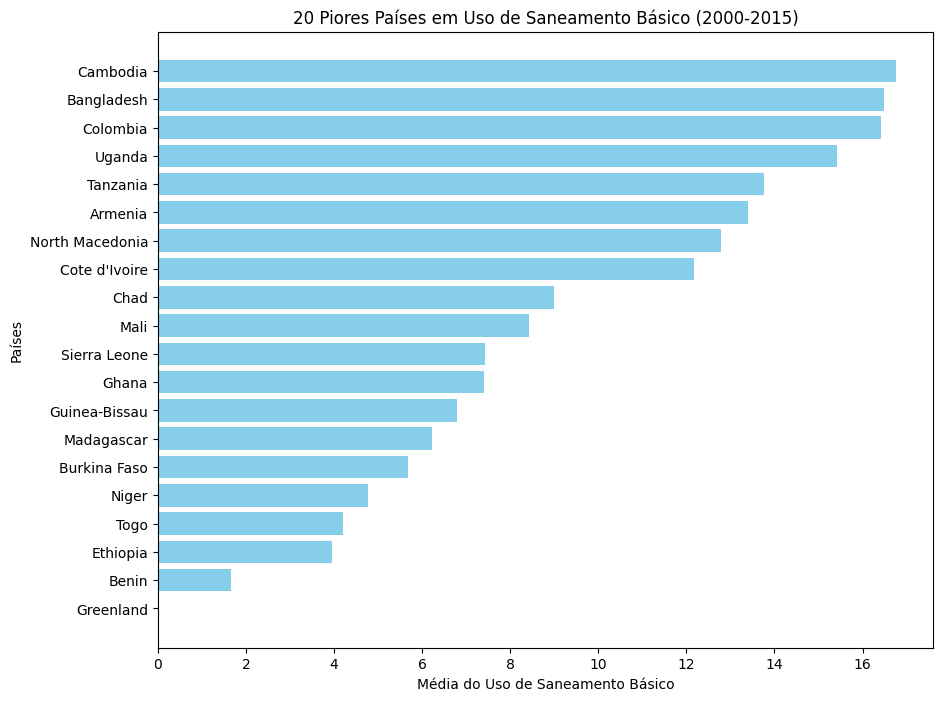

In [16]:
# Ordenar os países pela média em ordem ascendente e pegar os 20 piores
piores_paises = media_uso_saneamento_por_pais.sort_values(by='Proportion of Population (by years)', ascending=False).tail(20)

# Criar o gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(piores_paises['Entity'], piores_paises['Proportion of Population (by years)'], color='skyblue')
plt.xlabel('Média do Uso de Saneamento Básico')
plt.ylabel('Países')
plt.title('20 Piores Países em Uso de Saneamento Básico (2000-2015)')
plt.gca().invert_yaxis()
plt.show()


In [17]:
df_saneamento_2000_2015 = df_saneamento_uso[(df_saneamento_uso['Year'] >= 2000) & (df_saneamento_uso['Year'] <= 2015)]

# Calcular a média do uso de saneamento básico por ano
media_uso_saneamento_por_ano = df_saneamento_2000_2015.groupby('Year')['Proportion of Population (by years)'].mean().reset_index()

# Exibir a média por ano
print(media_uso_saneamento_por_ano)


    Year  Proportion of Population (by years)
0   2000                            49.551042
1   2001                            49.820000
2   2002                            50.150270
3   2003                            50.526554
4   2004                            50.655772
5   2005                            51.126711
6   2006                            51.435267
7   2007                            51.946400
8   2008                            52.470600
9   2009                            53.259205
10  2010                            53.825099
11  2011                            54.398411
12  2012                            54.974040
13  2013                            55.558940
14  2014                            55.796382
15  2015                            56.406316


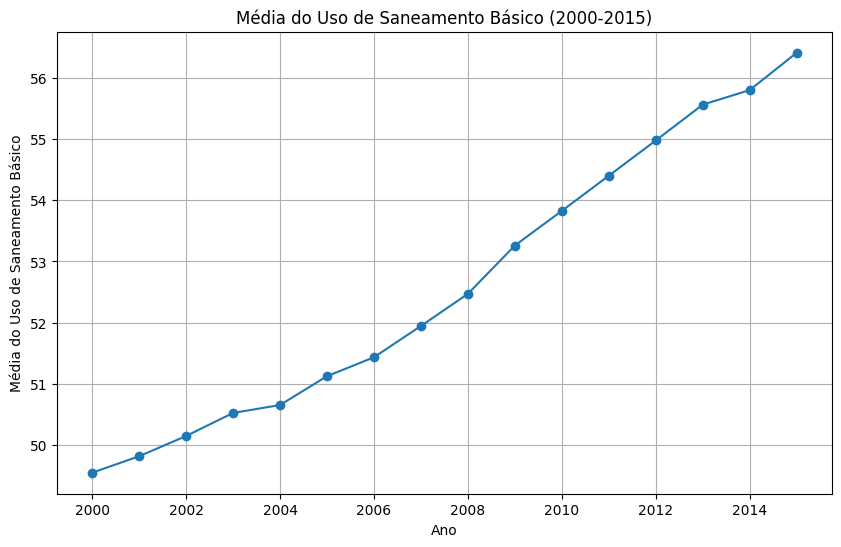

In [18]:
# Calcular a média do uso de saneamento básico por ano
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(media_uso_saneamento_por_ano['Year'], media_uso_saneamento_por_ano['Proportion of Population (by years)'], marker='o')
plt.xlabel('Ano')
plt.ylabel('Média do Uso de Saneamento Básico')
plt.title('Média do Uso de Saneamento Básico (2000-2015)')
plt.grid(True)
plt.show()


In [19]:
import scipy.stats as stats
dados = df_saneamento_uso['Proportion of Population (by years)']

# Calcular a média e o desvio padrão
media = np.mean(dados)
desvio_padrao = np.std(dados)

# Definir o nível de confiança (por exemplo, 95%)
nivel_confianca = 0.95

# Calcular o tamanho da amostra
tamanho_amostra = len(dados)

# Calcular o erro padrão
erro_padrao = stats.sem(dados)

# Calcular o intervalo de confiança
intervalo_confianca = stats.t.interval(nivel_confianca, tamanho_amostra - 1, loc=media, scale=erro_padrao)

print(f'A média é: {media}')
print(f'O desvio padrão é: {desvio_padrao}')
print(f'O intervalo de confiança (95%) para a média é: {intervalo_confianca}')


A média é: 54.31598665118979
O desvio padrão é: 30.29575957407991
O intervalo de confiança (95%) para a média é: (53.30396935688979, 55.32800394548979)


## Mortes por saneamento básico não seguro

In [24]:
df_mortes_saneamento = pd.read_csv('share-deaths-unsafe-sanitation.csv', sep=',')

#df_sem_saneamento  = df_saneamento[['Entity','Year','san_sm_number_without']]
df_mortes_saneamento = df_mortes_saneamento.rename(columns={'Share of total deaths that are from all causes attributed to unsafe sanitation, in both sexes aged age-standardized': 'Death'})
df_mortes_saneamento.head()

,Entity,Code,Year,Death
0,Afghanistan,AFG,1990,0.794453
1,Afghanistan,AFG,1991,0.790107
2,Afghanistan,AFG,1992,0.810320
3,Afghanistan,AFG,1993,0.965435
4,Afghanistan,AFG,1994,0.894778


In [25]:
df_mortes_saneamento_novo = df_mortes_saneamento.rename(columns={'Entity': 'Country'})

# Em seguida, faça o merge usando a coluna 'Country' como chave:
merged_df_12 = pd.merge(merged_df_12, df_mortes_saneamento_novo, on='Country', how='inner')
# Lista de anos desejados
anos_desejados = [2000, 2010, 2015, 2019]

# Filtrar o DataFrame para incluir apenas as linhas com os anos desejados
merged_df_12 = merged_df_12[merged_df_12['Year'].isin(anos_desejados)]

# Agora, merged_df_12 contém apenas as linhas com os anos 2000, 2010, 2015 e 2019.
merged_df_12 = merged_df_12.drop(columns = ['Code_x', 'Code_y', 'Year_x', 'Year_y', 'Death_x', 'Death_y', 'Code'], axis=0)
merged_df_12 = merged_df_12.drop_duplicates()
merged_df_12.head()

,Indicator,ParentLocation,Country,Dim1,LifeExp_2000,LifeExp_2010,LifeExp_2015,LifeExp_2019,HDI Rank,HDI_2000,HDI_2010,HDI_2015,HDI_2019,Year,Death
10,Life expectancy at birth (years),Africa,Algeria,Both sexes,72.21,75.85,76.54,77.13,91.0,0.637,0.721,0.740,0.748,2000,0.160559
20,Life expectancy at birth (years),Africa,Algeria,Both sexes,72.21,75.85,76.54,77.13,91.0,0.637,0.721,0.740,0.748,2010,0.067445
25,Life expectancy at birth (years),Africa,Algeria,Both sexes,72.21,75.85,76.54,77.13,91.0,0.637,0.721,0.740,0.748,2015,0.050067
29,Life expectancy at birth (years),Africa,Algeria,Both sexes,72.21,75.85,76.54,77.13,91.0,0.637,0.721,0.740,0.748,2019,0.037760
3610,Life expectancy at birth (years),Africa,Angola,Both sexes,49.30,58.07,61.72,63.06,148.0,0.400,0.517,0.572,0.581,2000,7.573959


Podemos observar que as mortes pelo não uso do saneamento básico de forma apropriada, pode não afetar a expectativa de vida nos paises. Ou seja, existem outros fatores que influenciam nisso

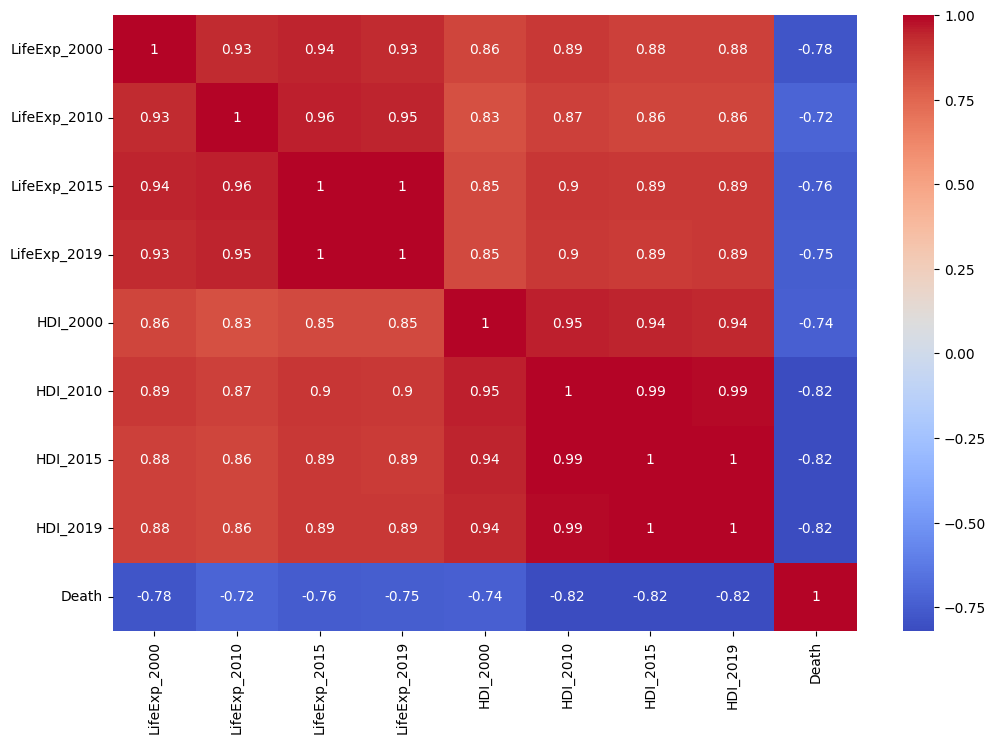

In [26]:
import pandas as pd

# Suponha que você já tenha importado seu DataFrame com os dados.

# Selecione as colunas relevantes para o cálculo da matriz de correlação.
colunas_selecionadas = ['LifeExp_2000', 'LifeExp_2010', 'LifeExp_2015', 'LifeExp_2019', 'HDI_2000', 'HDI_2010', 'HDI_2015', 'HDI_2019', 'Death']

# Crie um novo DataFrame contendo apenas as colunas selecionadas.
df_correlacao = merged_df_12[colunas_selecionadas]

# Calcule a matriz de correlação usando o método corr().
matriz_correlacao = df_correlacao.corr()

# Agora, matriz_correlacao contém as correlações entre as variáveis selecionadas nos anos desejados.

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm")
plt.show()

Quanto maior o indice de desenvolvimento humano, mais pessoas usam saneamento básico seguro, maior a expectativa de vida, e menos pessoas morrem por falta de saneamento básico

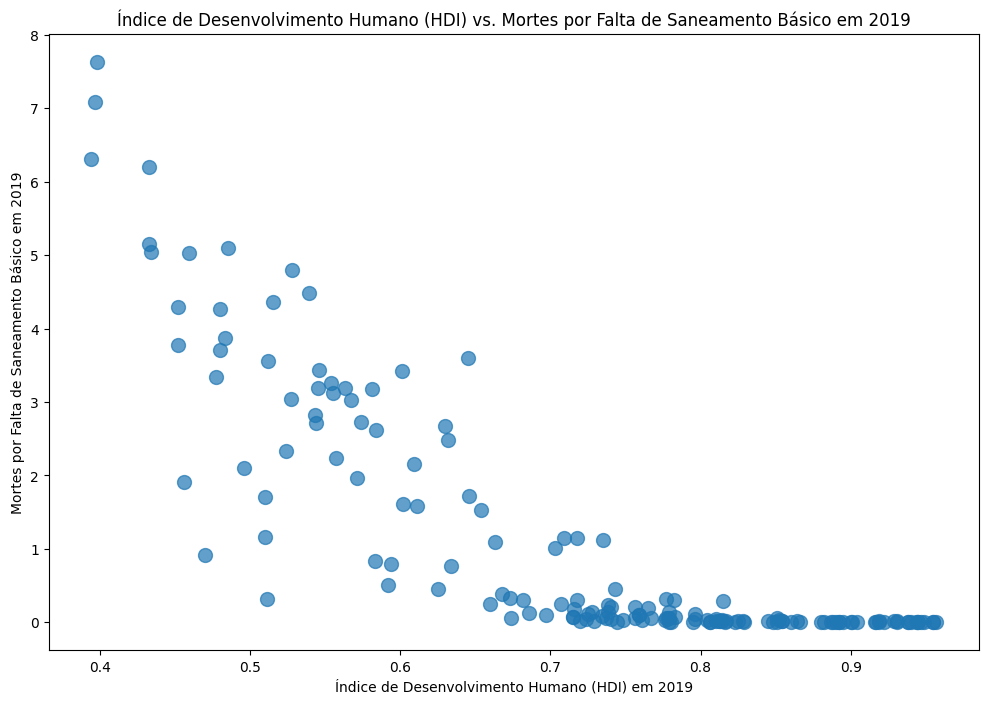

In [27]:
# Filtre o DataFrame para conter apenas os dados de 2019.
df_2019 = merged_df_12[merged_df_12['Year'] == 2019]

# Crie o gráfico de dispersão.
plt.figure(figsize=(12, 8))

# Use o método scatter do matplotlib para criar o gráfico.
scatter = plt.scatter(df_2019['HDI_2019'], df_2019['Death'], s=100, alpha=0.7)

# Defina os rótulos dos eixos e o título.
plt.title('Índice de Desenvolvimento Humano (HDI) vs. Mortes por Falta de Saneamento Básico em 2019')
plt.xlabel('Índice de Desenvolvimento Humano (HDI) em 2019')
plt.ylabel('Mortes por Falta de Saneamento Básico em 2019')

# Exiba o gráfico.
plt.show()


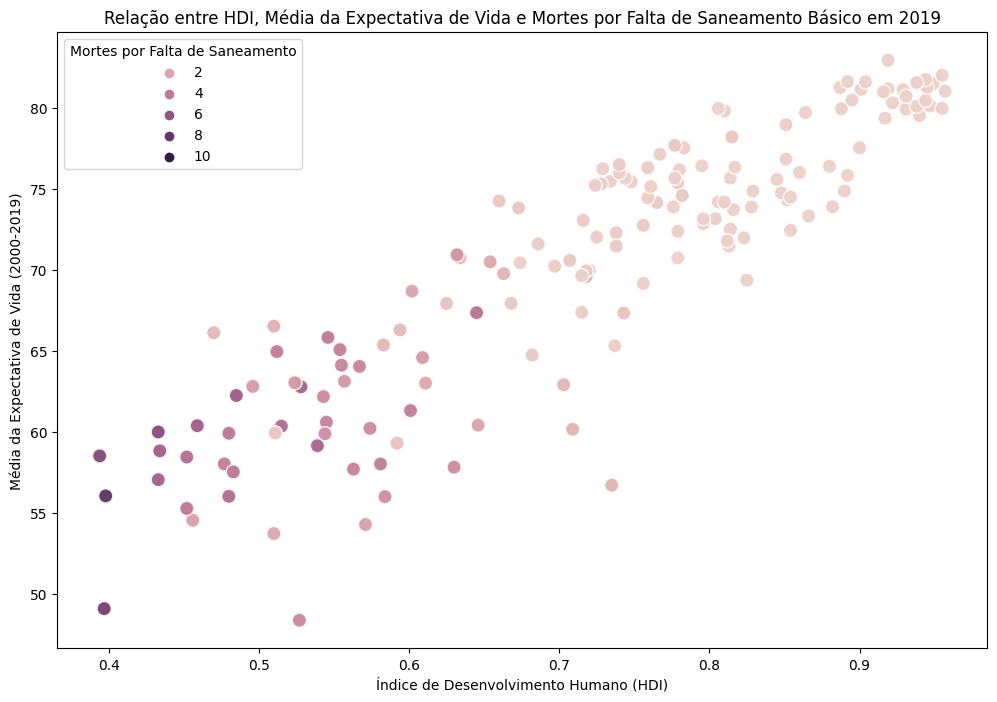

In [28]:
anos_interesse = [2000, 2010, 2015, 2019]
df_anos_interesse = merged_df_12[merged_df_12['Year'].isin(anos_interesse)]

# Calcular a média da expectativa de vida para os anos de interesse
df_anos_interesse['Media_LifeExp'] = df_anos_interesse[['LifeExp_2000', 'LifeExp_2010', 'LifeExp_2015', 'LifeExp_2019']].mean(axis=1)

plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(x='HDI_2019', y='Media_LifeExp', hue='Death', data=df_anos_interesse, s=100, alpha=0.7)

plt.title('Relação entre HDI, Média da Expectativa de Vida e Mortes por Falta de Saneamento Básico em 2019')
plt.xlabel('Índice de Desenvolvimento Humano (HDI)')
plt.ylabel('Média da Expectativa de Vida (2000-2019)')

# Mostrar a barra de legenda
plt.legend(title='Mortes por Falta de Saneamento')

# Mostrar o gráfico
plt.show()


In [29]:
# Filtrar os dados para o intervalo de anos desejado (2000 a 2019)
df_mortes_2000_2019 = df_mortes_saneamento[(df_mortes_saneamento['Year'] >= 2000) & (df_mortes_saneamento['Year'] <= 2019)]

# Calcular a média de mortes por país
media_mortes_por_pais = df_mortes_2000_2019.groupby('Entity')['Death'].mean().reset_index()
media_mortes_por_pais.sort_values(by='Death')


,Entity,Death
130,Monaco,0.000623
77,Greece,0.000927
173,San Marino,0.000968
132,Montenegro,0.001570
60,England,0.001749
...,...,...
185,Somalia,6.342091
90,India,6.399419
35,Central African Republic,6.682566
142,Niger,7.854997


In [31]:
# Extrair a coluna 'Death'
dados = df_mortes_saneamento['Death']

# Calcular a média e o desvio padrão
media = np.mean(dados)
desvio_padrao = np.std(dados)

# Definir o nível de confiança (por exemplo, 95%)
nivel_confianca = 0.95

# Calcular o tamanho da amostra
tamanho_amostra = len(dados)

# Calcular o erro padrão
erro_padrao = stats.sem(dados)

# Calcular o intervalo de confiança
intervalo_confianca = stats.t.interval(nivel_confianca, tamanho_amostra - 1, loc=media, scale=erro_padrao)

print(f'A média é: {media}')
print(f'O desvio padrão é: {desvio_padrao}')
print(f'O intervalo de confiança (95%) para a média é: {intervalo_confianca}')


A média é: 1.5735125392050322
O desvio padrão é: 2.322829392547672
O intervalo de confiança (95%) para a média é: (1.518451301451666, 1.6285737769583983)


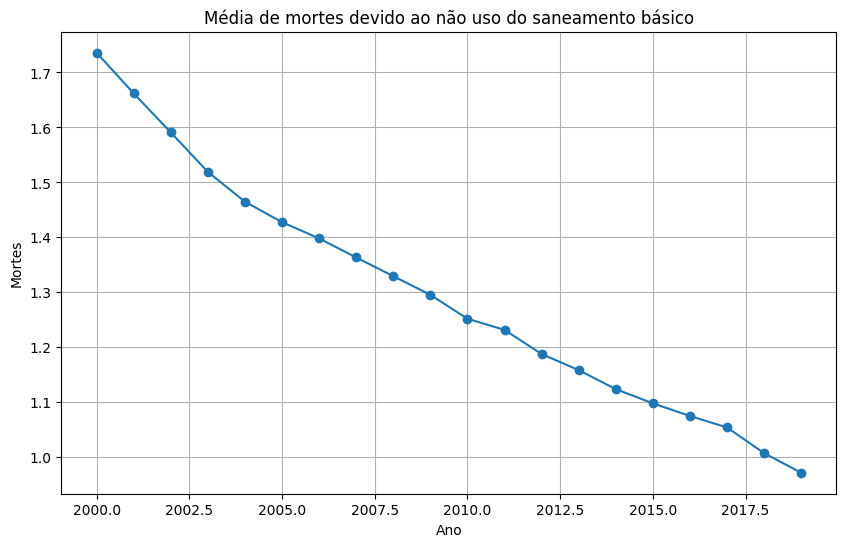

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

media_mortes = df_mortes_2000_2019.groupby('Year')['Death'].mean().reset_index()


# Criar um gráfico de linha mostrando o crescimento
plt.figure(figsize=(10, 6))
plt.plot(media_mortes['Year'], media_mortes['Death'], marker='o')
plt.xlabel('Ano')
plt.ylabel('Mortes')
plt.title('Média de mortes devido ao não uso do saneamento básico')
plt.grid(True)
plt.show()


## Concentração de Particulas no ar

In [33]:
df_poluicao = pd.read_csv('particular_matters.csv', sep=',')

df_poluicao_valores  = df_poluicao[['Dim1', 'Period','Location','ParentLocationCode', 'IndicatorCode', 'Value']]
df_poluicao_valores.head()

FileNotFoundError: ignored

1. Analisar proporção da população

In [ ]:
df_poluicao_valores = df_poluicao_valores.drop_duplicates(subset=['Location', 'Period'], keep='first')

# Adicionar índice
df_poluicao_valores['Index'] = df_poluicao_valores.groupby('Location').cumcount()

# Pivote o DataFrame
df_pivotado = df_poluicao_valores.pivot(index='Location', columns='Period', values='Value')

# Adicionar as colunas extras ao DataFrame pivotado
df_pivotado['Dim1'] = df_poluicao_valores.groupby('Location')['Dim1'].first()
df_pivotado['ParentLocationCode'] = df_poluicao_valores.groupby('Location')['ParentLocationCode'].first()
df_pivotado['IndicatorCode'] = df_poluicao_valores.groupby('Location')['IndicatorCode'].first()

# Exibir o DataFrame com as colunas extras
df_pivotado.head()
